In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('datos_planta2.csv')

label_encoder = LabelEncoder()
df['state_encoded'] = label_encoder.fit_transform(df['state'])

# Separamos features y target
X = df[['humidity', 'temperature', 'light',
        'humidity_yesterday', 'temperature_yesterday', 'light_yesterday']]
y = df['state_encoded']  # Usamos la versión codificada para el modelo


# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

,humidity,light,temperature,timestamp,state,humidity_yesterday,light_yesterday,temperature_yesterday,state_encoded
0,46.0,21.0,24.13,2025-04-22 07:35:00.595,Normal,62.697707,-8.251544,11.781720,2
1,43.0,55.0,14.85,2025-04-22 07:45:00.611,Normal,3.277328,8.555796,25.807548,2
2,46.0,53.0,12.43,2025-04-22 07:55:00.626,Normal,33.500679,9.690171,26.192987,2
3,44.0,62.0,13.46,2025-04-22 08:05:00.641,Normal,6.846055,32.005176,19.277781,2
4,44.0,62.0,13.52,2025-04-22 08:15:00.656,Normal,0.704795,48.535953,21.623192,2


Accuracy: 0.6796368352788587

Reporte de clasificación:
              precision    recall  f1-score   support

     Critico       0.38      0.49      0.43        81
  Muy Triste       0.64      0.58      0.61       185
      Normal       0.90      0.87      0.89       366
      Triste       0.40      0.41      0.40       139

    accuracy                           0.68       771
   macro avg       0.58      0.59      0.58       771
weighted avg       0.69      0.68      0.69       771



/home/agustinpanizza/Documents/Facultad/IA/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


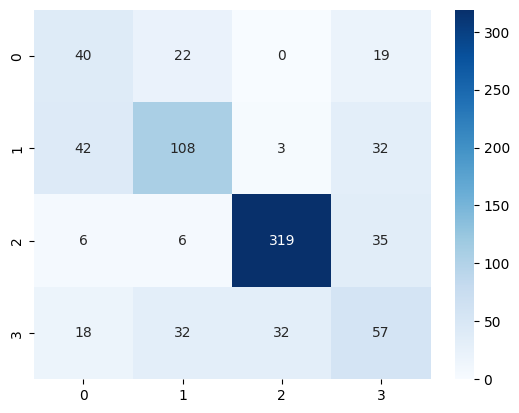

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Crear pipeline con escalado y modelo
# (La regresión logística es sensible a la escala de los features)
log_reg = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        multi_class='multinomial',  # Para problemas multiclase
        solver='lbfgs',            # Algoritmo de optimización
        max_iter=1000,             # Número máximo de iteraciones
        random_state=42,
        class_weight='balanced'    # Para manejar clases desbalanceadas
    )
)

# 2. Entrenar el modelo
log_reg.fit(X_train, y_train)

# 3. Evaluar el modelo
y_pred = log_reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [14]:
scaler = log_reg.named_steps['standardscaler']
lr     = log_reg.named_steps['logisticregression']

means  = scaler.mean_          # length 3
scales = scaler.scale_         # length 3
coefs  = lr.coef_[0]           # first class vs rest  (shape (3,))
bias   = lr.intercept_[0]

print("means =", means)
print("scales =", scales)
print("coefs =", coefs)
print("bias  =", bias)


means = [24.54899777 20.95634902 17.98162584 26.76773195 20.95911447 19.20759331]
scales = [24.22570061  2.39963187 41.75260147 24.34974459  2.72787075 41.55908693]
coefs = [ 0.35338097 -0.37517662  0.09711638 -0.30009378 -0.24447124 -0.08014082]
bias  = 0.17525277897114952
